In [86]:
from test_device import tRNSDevice
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.fft import fft, ifft, fftfreq
import numpy as np

In [87]:
raw_array= tRNSDevice().get_adc_data()

Запрос ADC данных...
[ESP32 LOG] CMD received: 0x82, len=0
DEBUG: msg_type = 0x02, payload size = 80000 bytes
✓ Получено 40000 сэмплов
  Первые 10 значений: [2623 2637 2651 2644 2669 2651 2609 2524 2450 2394]
  Min=1902, Max=2717, Mean=2290.2


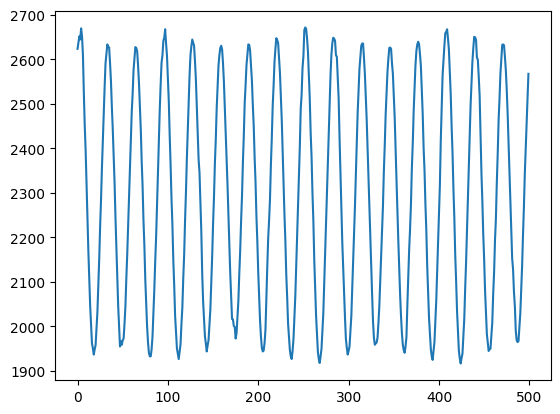

In [88]:
plt.plot(raw_array[:500])

In [89]:
len(raw_array)

40000

(array([6594., 4561., 3454., 3081., 2998., 3070., 3235., 3736., 6514.,
        2757.]),
 array([1902. , 1983.5, 2065. , 2146.5, 2228. , 2309.5, 2391. , 2472.5,
        2554. , 2635.5, 2717. ]),
 <BarContainer object of 10 artists>)

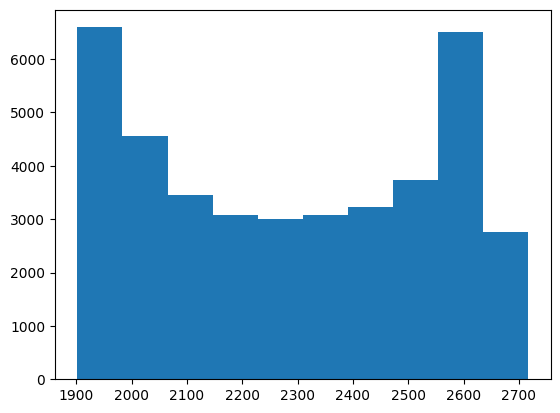

In [90]:
plt.hist(raw_array)

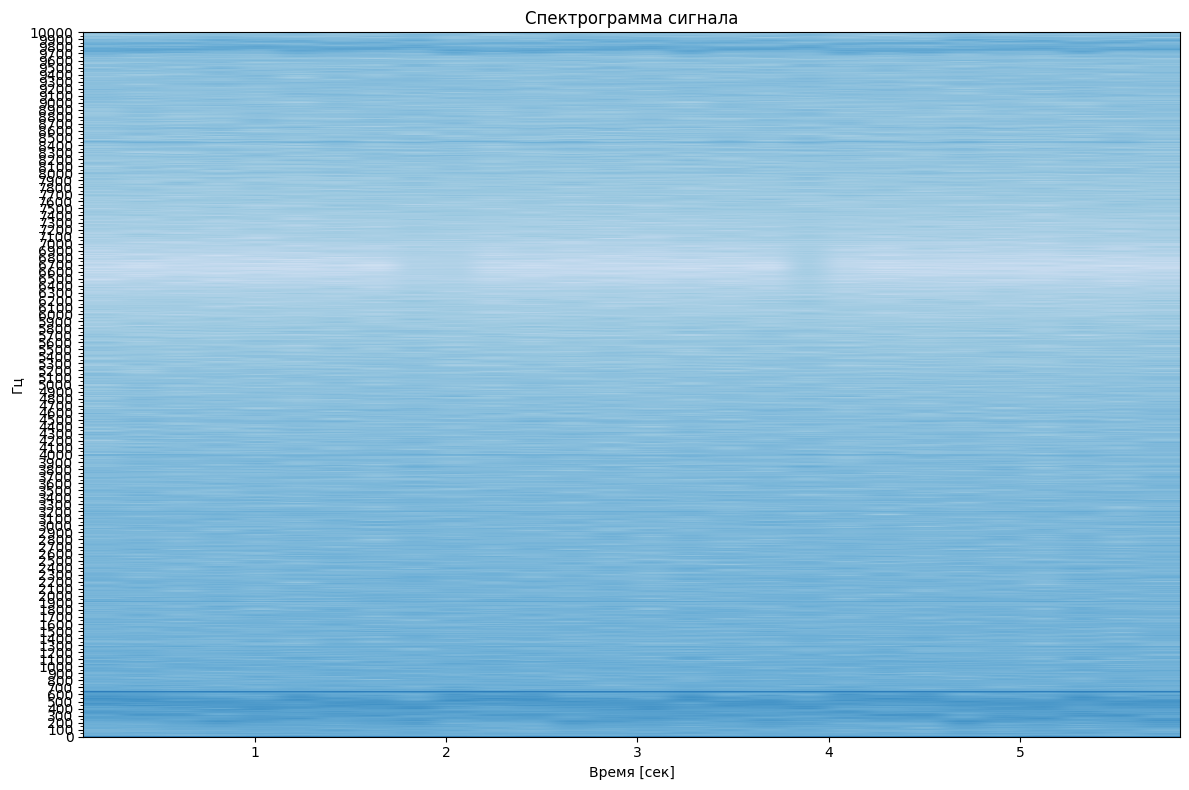

In [97]:
def plot_spectrogram_to_ax(ax, loop_signal, title, sample_rate=8000, NFFT=8192, noverlap=4096, cmap='Blues'):
    signal = np.concatenate([loop_signal, loop_signal, loop_signal])
    ax.specgram(signal, NFFT=NFFT, Fs=sample_rate, noverlap=noverlap, cmap=cmap)
    ax.set_xlabel('Время [сек]')
    ax.set_ylabel('Гц')
    ax.set_ylim(0, sample_rate / 2)
    ax.major_locator = ticker.MultipleLocator(base=100)
    ax.yaxis.set_major_locator(ax.major_locator)
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=50)) 
    ax.set_title(title)

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
plot_spectrogram_to_ax(axes, raw_array,  'Спектрограмма сигнала', sample_rate=20000,)


plt.tight_layout()
plt.show()

In [82]:
filtered = (raw_array[2:]+raw_array[1:-1]+raw_array[0:-2])/3

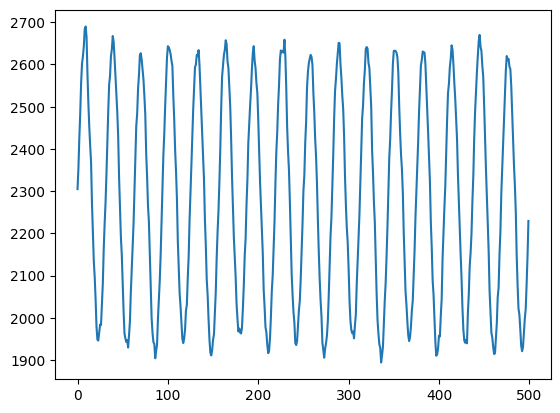

In [93]:
plt.plot(filtered[:500])

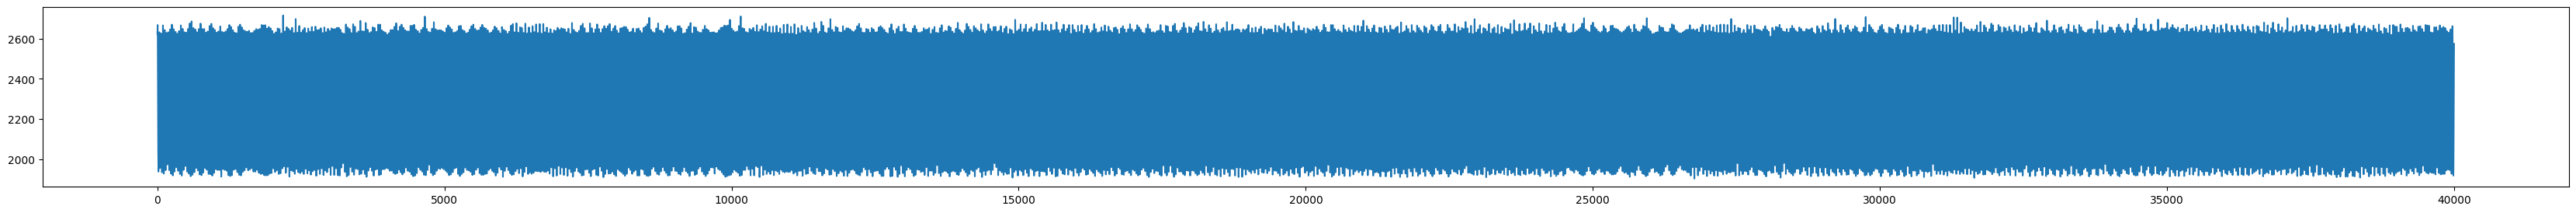

In [108]:
plt.subplots(1, 1, figsize=(42, 3))
plt.plot(raw_array[:45500])